<a href="https://colab.research.google.com/github/VamBay/DS4BME_YUANWEI_XU/blob/master/nyc_parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#===========================================
# Read data.  Change DATAPATH if necessary
#===========================================
try:
    # Executes if running in Google Colab
    from google.colab import drive
    drive.mount('gdrive/')
    DATAPATH = "gdrive/My Drive/DS4BME/" # Change path to location of data if necessary
except:
    # Executes if running locally (e.g. Anaconda)
    DATAPATH = "./"

Mounted at gdrive/


In [ ]:
df = traindata = pd.read_csv('/'.join((DATAPATH,'nyc_parking_tickets.csv')))
df.head()

,Plate_ID,Registration_State,Plate_Type,Vehicle_Make,Issuer_Code,Street_Name,Vehicle_Year
0,658ZOV,CT,PAS,JEEP,929329,STEUBEN ST,0
1,BE11259,NY,COM,NaN,944623,3RD,0
2,GYA6065,NY,PAS,GMC,915643,MERRICK BLVD,2014
3,28648MH,NY,COM,MERCU,950103,CHRISTOPHER ST,0
4,DTY8552,NY,PAS,TOYOT,959536,UNION ST,2015


##Step 1##

In [ ]:
print(df.shape[0], "records were read from file.")

3136 records were read from file.


##Step 2##

In [ ]:
df.dropna()

df = df.loc[df['Issuer_Code'] * df['Vehicle_Year'] != 0] #drop rows with '0' Issuer_Code or Vehicle_Year

df_99state = df[df.Registration_State.apply(lambda x: x.isnumeric())] #identify rows with invalid states
df_999plate = df[df.Plate_Type.apply(lambda x: x.isnumeric())] #identify rows with invalid plates

cond1 = df['Registration_State'].isin(df_99state['Registration_State']) #drop rows with invalid states
df.drop(df[cond1].index, inplace = True)

cond2 = df['Plate_Type'].isin(df_999plate['Plate_Type']) #drop rows with invalid plates
df.drop(df[cond2].index, inplace = True)

In [ ]:
df = df[df['Vehicle_Year'] < 2018] #keep years before 2018
df.shape

(2989, 7)

In [ ]:
print(df.shape[0], "records left after cleanup.")

2989 records left after cleanup.


##Step 3##

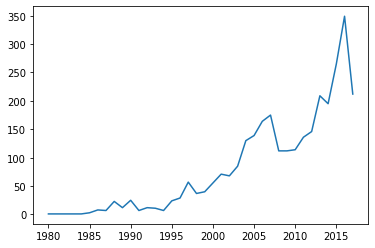

In [ ]:
year_tickets_df = df.groupby('Vehicle_Year').count()
year_tickets_df = year_tickets_df.iloc[:, 0]
year_tickets_df.plot(xlabel='')

##Step 4##

In [ ]:
make_tickets_df = df.groupby('Vehicle_Make').count()
make_tickets_df = make_tickets_df.sort_values(by='Plate_ID', ascending=False)
make_tickets_df = make_tickets_df.iloc[:, 0]
print("Top 5 vehicle-makes with the most tickets...\n", make_tickets_df.head(5))

Top 5 vehicle-makes with the most tickets...
 Vehicle_Make
FORD     336
FRUEH    276
TOYOT    274
HONDA    230
NISSA    202
Name: Plate_ID, dtype: int64


##Step 5##

In [ ]:
street_tickets_df = df.groupby('Street_Name').count()
street_tickets_df = street_tickets_df.sort_values(by='Plate_ID', ascending=False)
street_tickets_df = street_tickets_df.iloc[:, 0]
print("The street where commercial vehicles got the most ticket:\n", street_tickets_df.head(1))

The street where commercial vehicles got the most ticket:
 Street_Name
BROADWAY    72
Name: Plate_ID, dtype: int64


##Step 6##

In [ ]:
state_year_df = df[['Registration_State', 'Vehicle_Year']]
state_year_df = state_year_df.groupby('Registration_State').agg({'mean'})
state_year_df = state_year_df.apply(lambda x: x.sort_values(ascending=False))
state_year_df.head()

,Vehicle_Year
,mean
Registration_State,
MS,2017.0
OH,2017.0
KY,2016.0
GA,2016.0
NV,2016.0


In [ ]:
print("The state with newest vehicles:\n", state_year_df.head(1))

The state with newest vehicles:
                    Vehicle_Year
                           mean
Registration_State             
MS                       2017.0


In [ ]:
print("The state with oldest vehicles:\n", state_year_df.tail(1))

The state with oldest vehicles:
                    Vehicle_Year
                           mean
Registration_State             
ME                       1993.0
